In [1]:
###### IMPORT ######
import librosa as lr                  # specialized in loading, analyzing and visualizing adio datas 
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import Audio     # creates an HTML player we can easly use here 

In [3]:
###### LOADING THE AUDIOS ######
files = [f for f in os.listdir('../data/generated/') if f.endswith('wav')]
files.sort()
print(f'files = {files}')

amplitudes = {}
sampling_rates = {}

for i, file in enumerate(files):
    print(f'loading sample {i+1}...')
    file_path = os.path.join('../data/generated/', file)
    amp, sr = lr.load(file_path)                          # It returns the amplitudes (numpy array) and the sampling rate for each audio
    amplitudes[file] = amp
    sampling_rates[file] = sr
    
print('Successfully loaded')

files = ['sample_1_a_90s_rock_song_with.wav', 'sample_2_a_calm_relaxing_lofi.wav', 'sample_3_epic_cinematic_music.wav', 'sample_4_a_simple_melancholic.wav']
loading sample 1...
loading sample 2...
loading sample 3...
loading sample 4...
Successfully loaded


In [15]:
###### CREATING AUDIO PLAYER ######
i = 1
for file, amp in amplitudes.items():
    sr = sampling_rates[file]
    print(f'\n---sample {i}---')
    display(Audio(data = amp, rate = sr))
    i += 1


---sample 1---



---sample 2---



---sample 3---



---sample 4---



---sample 1 analysis---



---sample 2 analysis---


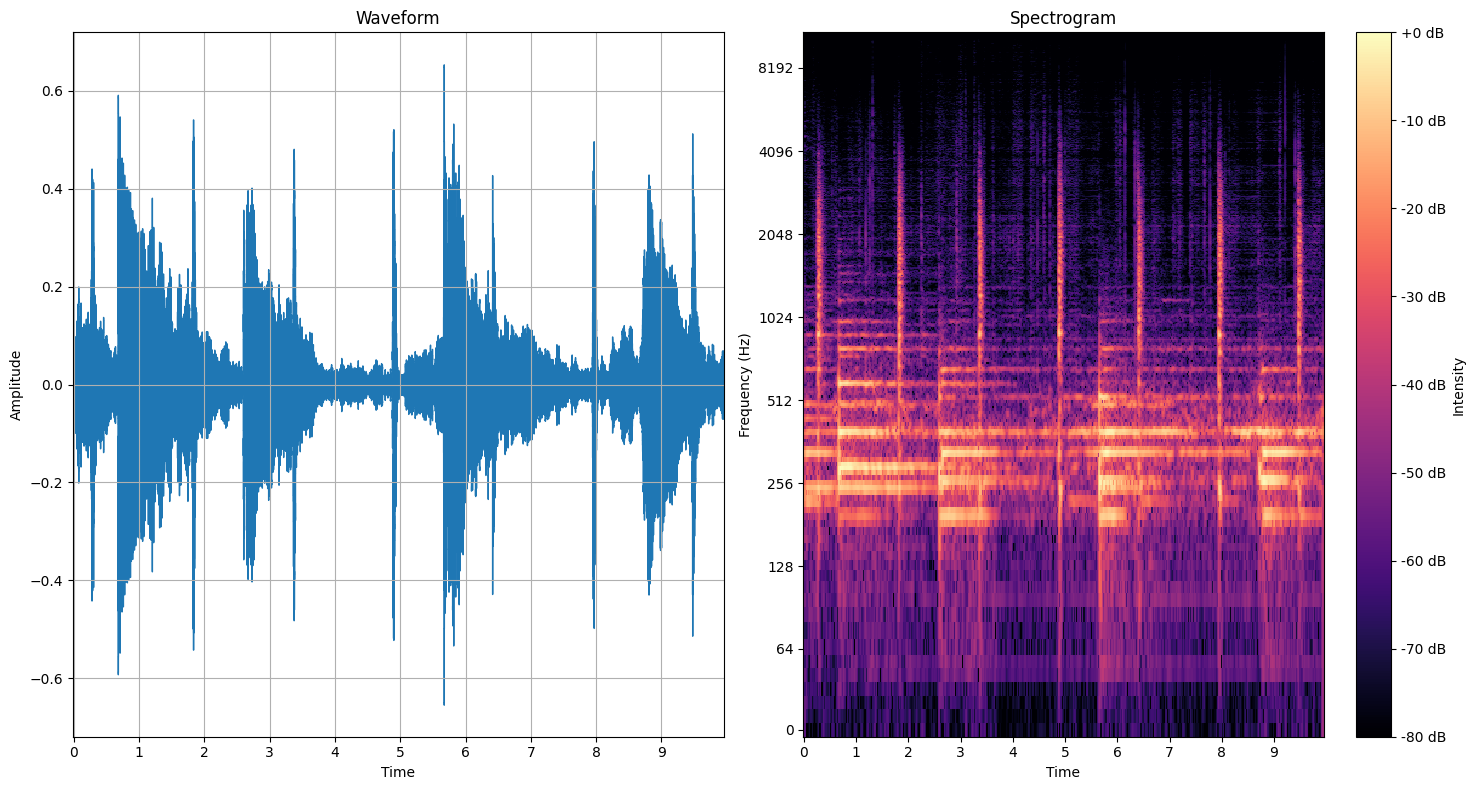


---sample 3 analysis---


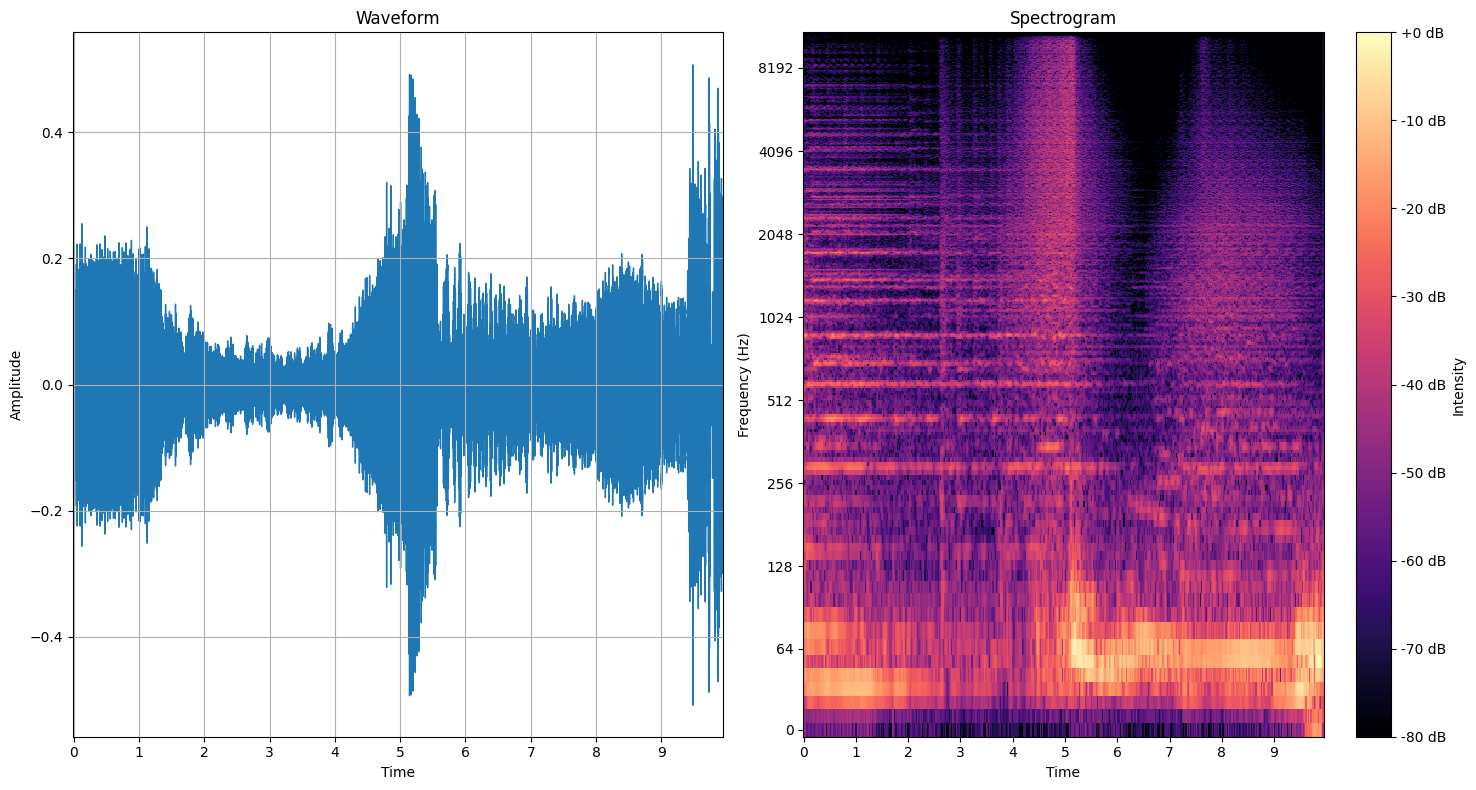


---sample 4 analysis---


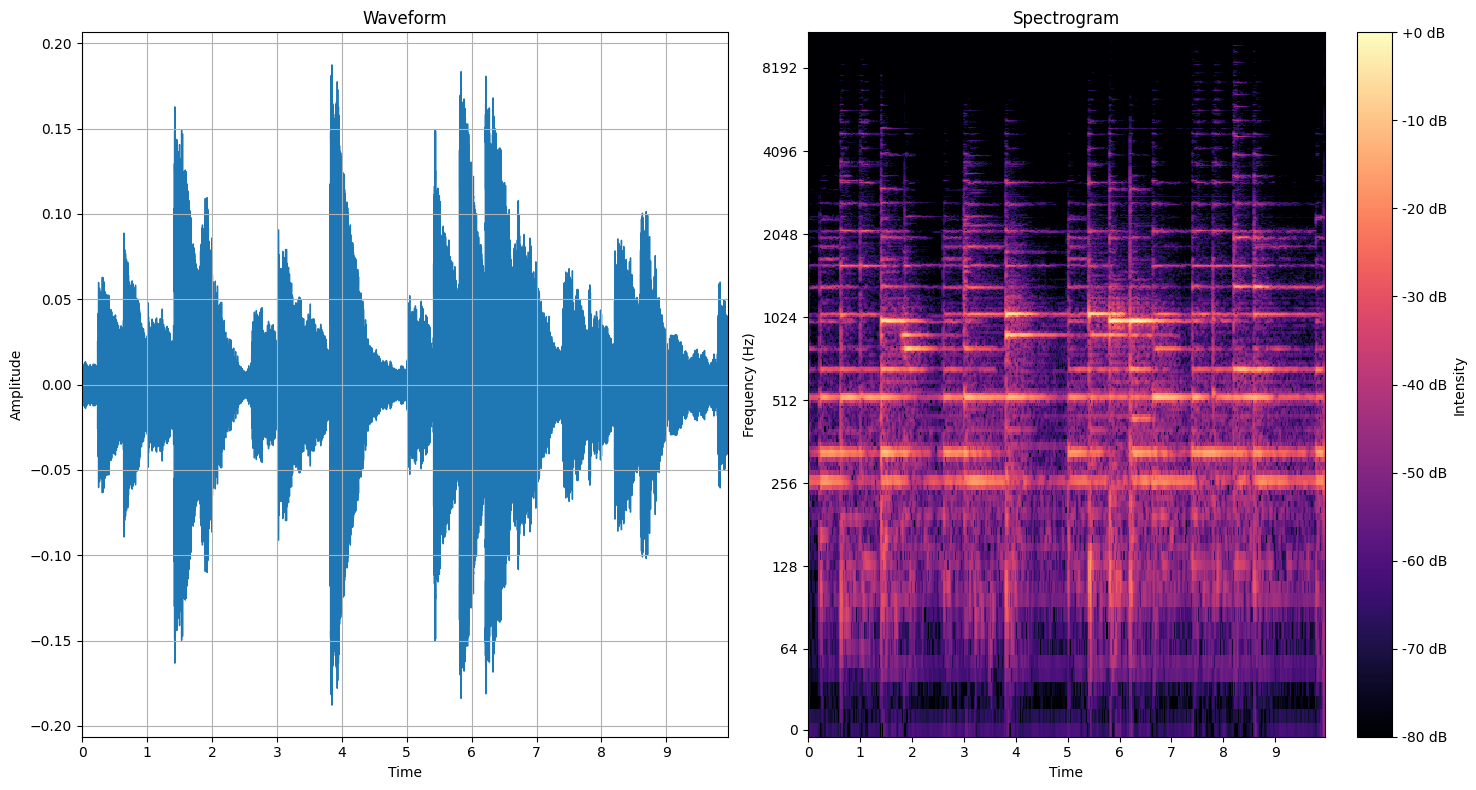

In [8]:
###### PLOTTING ######
plt.rcParams['figure.figsize'] = [15, 8] # Sets the size for each graph
i = 1

for file, amp in amplitudes.items():
    sr = sampling_rates[file]
    print(f"\n---{f'sample {i} analysis'}---")
    fig, axs = plt.subplots(1, 2, sharex=True) 
    
    # Waveform
    librosa.display.waveshow(amp, sr=sr, ax=axs[0])
    axs[0].set_title('Waveform')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True) 
    
    # Spectrogram
    D = librosa.stft(amp)  # Computes the Short-Time Fourier Transform. The Fourier Transform is a mathematical tool that decomposes 
                           # an audio signal into its fundamental frequency components: here, librosa divides 'amp' into short
                           # time windows of 2048 samples each, on which it applies the FT. The result is a 1025x429 matrix of complex
                           # numbers: the 1025 rows represent different frequencies from 0Hz to 16.000Hz (the rule is f_k = k*(sr/2048) for
                           # the k^th row), while the 429 cols are the windows in wich the audio has been divided. 

                           # Each complex number contains information about the wave's amplitude and phase in that specific moment.
                           # To plot the spectogram, we only need in the amplitude, which is given by the magnitude of the complex number.
    
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) # these magnitudes are converted to decibels: 'ref=np.max' means that the maximum 
                                                          # amplitude value is mapped to 0dB, and all other values are scaled accordingly.
                                                          # This means that S_db is now full of non-positive numbers (from -80dB to 0dB).
    
    img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=axs[1], cmap='magma')
    # We use a logaritmic scale because it's the way we perceive sounds. In fact, most of the musical information is found in the low 
    # frequencies and if we kept the linear scale, this part would be heavily compressed and the graph would be impossible to interpret.
    
    axs[1].set_title('Spectrogram')
    axs[1].set_ylabel('Frequency (Hz)')
    
    fig.colorbar(img, ax=axs[1], format='%+2.0f dB', label='Intensity')
    plt.tight_layout()
    plt.show()

    i += 1

In [ ]:
'''--- CHART ANALYSIS ---

In the waveform display of an audio to be restored, the following defects can typically be identified:

    ·Clipping: it occurs when the signal is so strong that it exceeds the maximum limit (+-1). The result is a 
               clean cut of the top (or bottom) of the wave, which causes a harsh and unpleasant sound.
               
    ·Low dinamic range: it's the difference between the softest and the loudest parts of the audio, and if it's small
                        we perceive the sound as flat and lifeless.
    ·DC offset: '''